<a href="https://colab.research.google.com/github/kim-donguk/Machine_Learning/blob/master/Day930_Machine_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/kim-donguk/Machine_Learning.git

Cloning into 'Machine_Learning'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


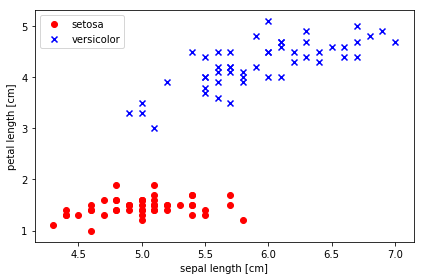

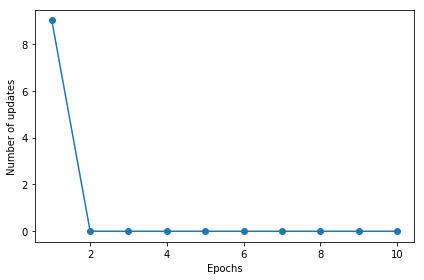

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[[3.3  0.  ]
 [3.32 0.  ]
 [3.34 0.  ]
 ...
 [7.94 6.08]
 [7.96 6.08]
 [7.98 6.08]]


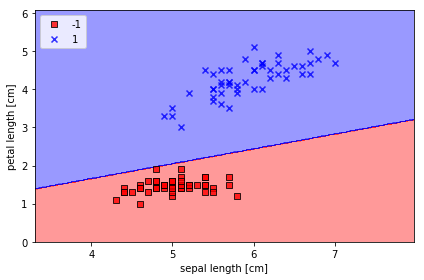

In [44]:
import numpy as np

class Perceptron(object): 

    ## Parameters
    # eta = Learning rate (float)
    # n_iter = 데이터를 학습시킬 횟수 (int)
    # random_state = 초기 weight 값 (int)
    ## Attributes(특성)
    # w_ = 학습 후 weight 값 (1d-array) Weights after fitting.
    # errors_ : 각 epoch 마다 오차(예측값과 실제값의 오차)가 저장될 공간 (list)

    #클래스의 초기화
    def __init__(self, eta=0.01, n_iter=50, shuffle=False, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):

        # X shpae = [샘플 개수, 특징](100, 0:2)
        # y = 샘플 결과(100) => setosa, virginica

        rgen = np.random.RandomState(self.random_state)
        # 확률 분포에서 랜덤한 값을 뽑아냄 normal(loc(평균), scale(표준편차), 출력 형태)
        # w_ 는 1 + X.shape[1] 만큼의 데이터를 얻음
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        
        #30번의 학습을 함
        for _ in range(self.n_iter):
            errors = 0
            if self.shuffle:
                X, y = self._shuffle(X, y)
                
            # zip(x, y) = 자료형울 묶어 주는 역활을 하는 함수
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            # append = 추가
            self.errors_.append(errors)
        return self

    # 학습 데이터 순서 섞기
    # 받을 데이터가 너무 밀집되어 있는 상태에서 학습을 시키면 과대적합이 만들어짐으로 사용해줌
    def _shuffle(self, X, y):
        # permutation = 순열(가능한 모든 조합을 출력함)
        r = np.random.permutation(len(y))
        return X[r], y[r]

    def net_input(self, X):
        """Calculate net input"""
        # dot = 행렬 곱
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        # where = 조건에 맞는 값의 인덱스 출력(True = 1, False = -1)
        return np.where(self.net_input(X) >= 0.0, 1, -1)


import pandas as pd

#총 150개의 데이터(setosa, virginica, 150(행) x 5(열))
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
#data frame
#matplotlib inline
import matplotlib.pyplot as plt

# (setosa, versicolor)구분 값을 array로 가져옴
y = df.iloc[0:100, 4].values
# setosa의 데이터를 -1 이외의 것들을 1로 바꿔 y에  저장
y = np.where(y == 'Iris-setosa', -1, 1) #setosa=-1, o.w.=1

# 꽃잎 길이와 꽃받침 길이 데이터를 저장
X = df.iloc[0:100, [0, 2]].values


# 산포그래프로 나타내기 위해서 필요한 작업
# 0~50까지의 데이터는 setosa로 빨강, o로 저장
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
# 50~99까지의 데이터는 versicolor로 파랑, x로 저장 
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')  # 꽃받침 길이(x축)
plt.ylabel('petal length [cm]')  # 꽃받침 길이(y축)

plt.legend(loc='upper left')  # 범례(왼쪽 상단)
plt.tight_layout()  # 레이아웃 자동 맞춤

#plt.savefig('./images/02_06.png', dpi=300)
plt.show()

# hyperparameters
ppn = Perceptron(eta=0.3, n_iter=10, shuffle=True)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.tight_layout()
# plt.savefig('./perceptron_1.png', dpi=300)
plt.show()

from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    # 그래프 색상
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))]) #unique = 중북된 원소 제거

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # 그리드 포인트 만들어주는 함수(2차원 함수)
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # print(xx1)
    # print(xx2)
    print(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    #새로운 입력 데이터에 대한 출력 값 예측
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

    # x, y 범위 설정
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    # 산포 그래프
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

# 데이터의 영역이 어떻게 나타느는지 시각화해줌
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [6]:
import numpy as np

a = np.array([[1,2],[3,4]])
s = np.sum(a)
print(s) #10

#axis = 0 이면 열끼리 더함
#axis = 1 이면 행끼리 더함
s = np.sum(a, axis=0)
print(s)
s = np.sum(a, axis=1)
print(s)

s = np.prod(a) #모든 요소의 곱
print(s)

10
[4 6]
[3 7]
24


In [22]:
lst = [
       [1,2,3],
       [4,5,6],
       [7,8,9]
]
arr = np.array(lst)

a = arr[0:2, 0:2]
print(a)

a = arr[1:,1:]
print(a)

lst = [
       [1,2,3,4],
       [5,6,7,8],
       [9,10,11,12]
]
a = np.array(lst)

s = a[[1,2],[1,0]] #(1,1), (2,0) 위치 원소
print(s)

[[1 2]
 [4 5]]
[[5 6]
 [8 9]]
[6 9]


In [36]:
#numpy 원소접근 
#슬라이싱 = 배열은 원본 배열과 같은 데이터 참조

a = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
b = a[0:2, 1:3]

print(a[0,1])
b[0,0] = 5 # b[0,0]는 a[0,1]과 같은 데이터
print(a[0,1])
print("{}".format(a))

2
5
[[ 1  5  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


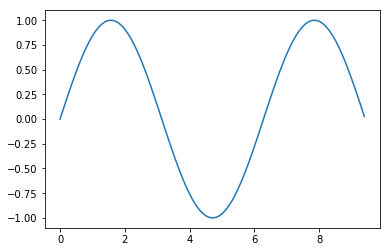

In [32]:
import numpy as np
import matplotlib.pyplot as plt

#사인 코사인 곡선의 x,y 좌표를 계산
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

plt.plot(x,y)
plt.show()

In [35]:
import numpy as np
from scipy import sparse
eye = np.eye(4)
print("Numpy 배열:\n{}".format(eye))

Numpy 배열:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [40]:
import pandas as pd
a = pd.DataFrame([
                  [10,20,30],
                  [40,50,60],
                  [70,80,90]
])
print(a)

    0   1   2
0  10  20  30
1  40  50  60
2  70  80  90


In [41]:
import pandas as pd
import numpy as np
s = pd.Series([1.0, 3.0, 5.0, 7.0, 9.0])
print(s)
m = np.mean(s)
print(m)

0    1.0
1    3.0
2    5.0
3    7.0
4    9.0
dtype: float64
5.0


In [42]:
import pandas as pd
# 키, 몸무게, 유형 데이터프레임 생성하기
tbl = pd.DataFrame({
"weight": [80.0, 70.4, 65.5, 45.9, 51.2],
"height": [170, 180, 155, 143, 154],
"type": [ "f", "n", "n", "t", "t"]
})
# 몸무게 목록 추출하기
print("몸무게 목록")
print(tbl["weight"])
# 몸무게와 키 목록 추출하기
print("몸무게와 키 목록")
print(tbl[["weight","height"]])
print("tbl[2:4]\n", tbl[2:4])
print("tbl[3:]\n", tbl[3:])


몸무게 목록
0    80.0
1    70.4
2    65.5
3    45.9
4    51.2
Name: weight, dtype: float64
몸무게와 키 목록
   weight  height
0    80.0     170
1    70.4     180
2    65.5     155
3    45.9     143
4    51.2     154
tbl[2:4]
    weight  height type
2    65.5     155    n
3    45.9     143    t
tbl[3:]
    weight  height type
3    45.9     143    t
4    51.2     154    t


In [43]:
import pandas as pd
tbl = pd.DataFrame({
"weight": [80.0, 70.4, 65.5, 45.9, 51.2, 72.5],
"height": [170, 180, 155, 143, 154, 160],
"gender": [ "f", "m", "m", "f", "f","m"]
})
print("몸무게와 키 목록")
print(tbl[["weight","height"]])
print("--- height가 160 이상인 것")
print(tbl[tbl.height >= 160])
print("--- gender가 m 인 것")
print(tbl[tbl.gender == "m"])


몸무게와 키 목록
   weight  height
0    80.0     170
1    70.4     180
2    65.5     155
3    45.9     143
4    51.2     154
5    72.5     160
--- height가 160 이상인 것
   weight  height gender
0    80.0     170      f
1    70.4     180      m
5    72.5     160      m
--- gender가 m 인 것
   weight  height gender
1    70.4     180      m
2    65.5     155      m
5    72.5     160      m


In [46]:
import pandas as pd
tbl = pd.DataFrame({
"weight": [80.0, 70.4, 65.5, 45.9, 51.2, 72.5],
"height": [170, 180, 155, 143, 154, 160],
"gender": [ "f", "m", "m", "f", "f","m"]
})

def norm(tbl, key):
    c = tbl[key]
    v_max = c.max()
    v_min = c.min()
    print(key, "=", v_min, "-", v_max)
    tbl[key] = (c - v_min) / (v_max - v_min)

norm(tbl, "weight")
norm(tbl, "height")
print(tbl)


weight = 45.9 - 80.0
height = 143 - 180
     weight    height gender
0  1.000000  0.729730      f
1  0.718475  1.000000      m
2  0.574780  0.324324      m
3  0.000000  0.000000      f
4  0.155425  0.297297      f
5  0.780059  0.459459      m


In [47]:
#퍼센트론 구현

import numpy as np

def AND(x1, x2, w1 = 0.5, w2 = 0.5, b = -0.7):
	x = np.array([x1, x2])
	w = np.array([w1, w2])
	return 1 if np.sum(x*w) + b >=0 else 0

def NAND(x1, x2, w1 = -0.5, w2 = -0.5, b = 0.7):
	x = np.array([x1, x2])
	w = np.array([w1, w2])
	return 1 if np.sum(x*w) + b >=0 else 0

def OR(x1, x2, w1 = 0.5, w2 = 0.5, b = -0.2):
	x = np.array([x1, x2])
	w = np.array([w1, w2])
	tmp = np.sum(x*w) + b
	if tmp <= 0:
		return 0
	else:
		return 1
		
inputs = [(0, 0), (1, 0), (0, 1), (1, 1)]
for x1, x2 in inputs:
	y = AND(x1, x2)
	print('({x1}, {x2}) -> {y}'.format(x1=x1, x2=x2, y=y))


(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


In [48]:
import numpy as np

def AND(x1, x2, w1 = 0.5, w2 = 0.5, b = -0.7):
	x = np.array([x1, x2])
	w = np.array([w1, w2])
	return 1 if np.sum(x*w) + b >=0 else 0

def NAND(x1, x2, w1 = -0.5, w2 = -0.5, b = 0.7):
	x = np.array([x1, x2])
	w = np.array([w1, w2])
	return 1 if np.sum(x*w) + b >=0 else 0

def OR(x1, x2, w1 = 0.5, w2 = 0.5, b = -0.2):
	x = np.array([x1, x2])
	w = np.array([w1, w2])
	tmp = np.sum(x*w) + b
	if tmp <= 0:
		return 0
	else:
		return 1

def XOR(x1,x2):
	s1=NAND(x1,x2)
	s2=OR(x1,x2)
	y=AND(s1,s2)
	return y

inputs = [(0, 0), (1, 0), (0, 1), (1, 1)]
for x1, x2 in inputs:
	y = XOR (x1, x2)
	print('({x1}, {x2}) -> {y}'.format(x1=x1, x2=x2, y=y))


(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


In [1]:
import numpy as np
rgen = np.random.RandomState(1)
w = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
print(w)

NameError: ignored

In [0]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)

In [18]:
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [29]:
df1 = df.iloc[0:100, 4].values
df2 = df.iloc[0:100, 0:2].values
r = np.random.permutation(len(df2))
df1
df1[r]

array(['Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Ir